#Importing all the required libraries for a CNN w/ Average Pooling

In [ ]:
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Loading Fashion MNIST and printing the initial data shape

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


#Visually printing the different classes

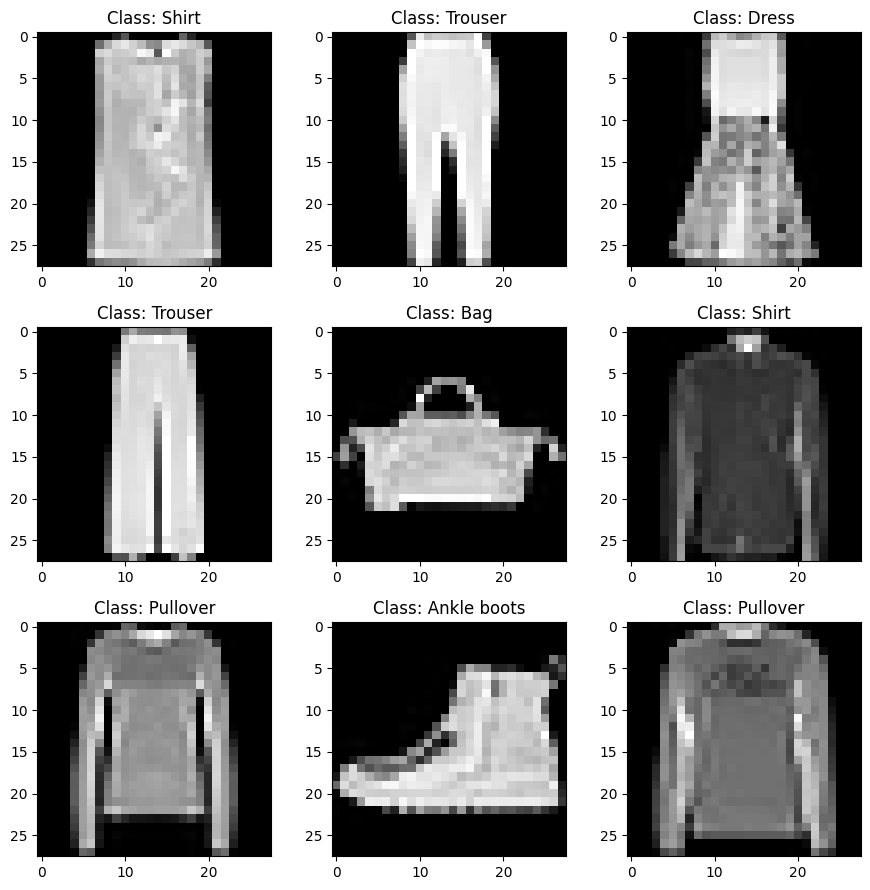

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)

classes = ['T-shirt/top',
           'Trouser',
           'Pullover',
           'Dress',
           'Coat',
           'Sandals',
           'Shirt',
           'Sneaker',
           'Bag',
           'Ankle boots']
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class: {}".format(classes[y_train[num]]))


plt.tight_layout()

#Reshaping data and dividing the pixels to change the range from [0,255] to [0.0, 1.0]

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()
#Defining the model type as sequential
input_shape=(28,28,1) #Defining the input shape based on the reshaping done earlier
model.add(Conv2D(64,kernel_size=(5, 5), activation='relu', input_shape=(input_shape))) #Adding a convolutional layer with 64 5x5 filters
model.add(AveragePooling2D(pool_size=(2,2), strides=1)) #Average Pooling layer as per the assignment requirement
model.add(Flatten()) #Takes the output from the 2 layers and flattens it into a 1-dimensional vector, allowing it to be used in the next layer
model.add(Dense(512, activation='relu')) #Final layer processing the output data after flattening
model.add(Dense(10, activation='softmax')) #Classification layer

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelf = model.fit(X_train, Y_train, batch_size=150, epochs=2, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/2
400/400 [==============================] - 296s 735ms/step - loss: 0.4196 - accuracy: 0.8521 - val_loss: 0.3223 - val_accuracy: 0.8838
Epoch 2/2
400/400 [==============================] - 277s 692ms/step - loss: 0.2816 - accuracy: 0.8976 - val_loss: 0.3243 - val_accuracy: 0.8770


In [ ]:
model.save('cnn_model.keras')

In [ ]:
train_Loss = modelf.history['loss']
train_Acc = modelf.history['accuracy']

val_Loss = modelf.history['val_loss']
val_Acc = modelf.history['val_accuracy']

#Training results in terms of accuracy and loss


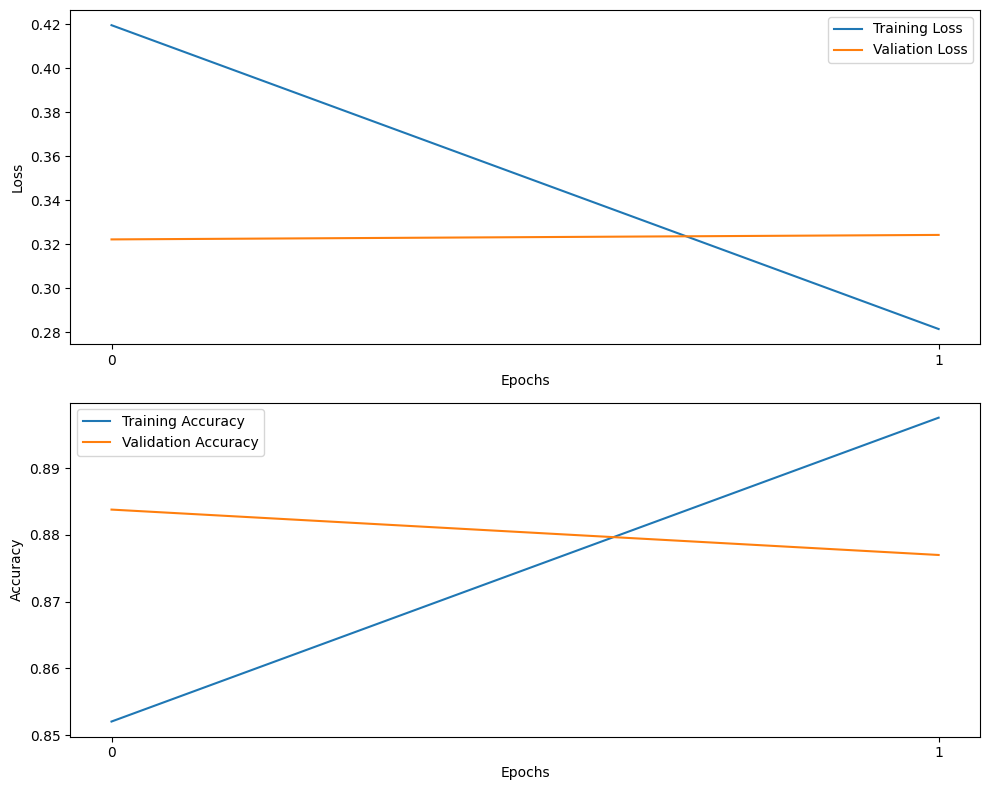

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)

xt = np.arange(0,2)

plt.subplot(2,1,1)
plt.plot(train_Loss, label='Training Loss')
plt.plot(val_Loss, label='Valiation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks(xt)
plt.legend()

plt.subplot(2,1,2)
plt.plot(train_Acc, label='Training Accuracy')
plt.plot(val_Acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(xt)
plt.legend()
plt.tight_layout()

#Evaulating the model
---



In [ ]:
test_Loss, test_Acc = model.evaluate(X_test,Y_test)

313/313 [==============================] - 12s 38ms/step - loss: 0.3243 - accuracy: 0.8770


In [ ]:
print("Test Loss: ",test_Loss)
print("Test Accuracy: ",test_Acc)

#Printing out the Confusion Matrix

In [ ]:
plt.rcParams['figure.figsize'] = (12,12)
vis = ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=classes)
vis.plot(cmap=plt.cm.PuBuGn)

NameError: ignored

#Testing the trained model on a random image from the dataset


In [ ]:
plt.rcParams['figure.figsize'] = (4,4)
num = random.randint(0, len(X_test))
plt.imshow(X_test[num], cmap='gray', interpolation='none')
plt.title("Class: {}".format(classes[y_test[num]]))

plt.tight_layout()

Pred = model.predict(X_test[num].reshape(1,28,28,1))

In [ ]:
print("Prediction")
print("------")
for i in range(len(Pred[0])):
  print(classes[i],": ",Pred[0][i])
print("------")

plt.rcParams['figure.figsize'] = (10,4) #
plt.bar(classes,Pred[0])
plt.title('Predictions')
plt.xlabel('Class')
plt.ylabel('Prediction')
plt.tight_layout()